# Analise de dados do Enem

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from dask import dataframe as dd # pip install dask[dataframe]
import time as tm
import re

In [136]:
# Ver encoding do csv
# with open('dados/MICRODADOS_ENEM_2019.csv') as f:
#     print(f)

In [2]:
df_enem = pd.read_csv('dados/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1', nrows=0)

In [3]:
df_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [4]:
colunas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [5]:
colunas_selec = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'TP_ENSINO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [6]:
inicio = tm.time()

dd_enem = dd.read_csv('dados/MICRODADOS_ENEM_2019.csv', blocksize=100*1024*1024, usecols=colunas_selec, sep=';', encoding='ISO-8859-1')
enem = dd_enem.compute(num_workers=8)

fim = tm.time()

print("Duração:", round(fim-inicio,2), "segundos")

Duração: 45.39 segundos


In [7]:
495/60

8.25

In [8]:
enem.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095270 entries, 0 to 91021
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NU_ANO                   int64  
 2   CO_MUNICIPIO_RESIDENCIA  int64  
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   SG_UF_RESIDENCIA         object 
 5   NU_IDADE                 int64  
 6   TP_SEXO                  object 
 7   TP_ESTADO_CIVIL          int64  
 8   TP_COR_RACA              int64  
 9   TP_ESCOLA                int64  
 10  TP_ENSINO                float64
 11  NU_NOTA_REDACAO          float64
 12  Q001                     object 
 13  Q002                     object 
dtypes: float64(2), int64(7), object(5)
memory usage: 1.9 GB


In [9]:
for tipos in ['object', 'float64', 'int64']:
    selecao_tipos = enem.select_dtypes(include=[tipos])
    total_usado_b  = selecao_tipos.memory_usage(deep=True).sum()
    total_usado_mb = round(total_usado_b / 1024 ** 2, 2)
    print(f"Total de memória utilizada por {tipos}: {total_usado_mb} MB")

Total de memória utilizada por object: 1545.94 MB
Total de memória utilizada por float64: 116.62 MB
Total de memória utilizada por int64: 310.99 MB


In [10]:
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,2019,1506807,Santarém,PA,21,M,1,3,1,NaN,780.0,D,E
1,190001004628,2019,1504059,Mãe do Rio,PA,16,F,1,3,1,NaN,600.0,D,E
2,190001004629,2019,1505502,Paragominas,PA,18,F,1,1,3,1.0,640.0,H,E
3,190001004630,2019,1507706,São Sebastião da Boa Vista,PA,23,M,0,3,2,1.0,NaN,D,D
4,190001004631,2019,1503903,Juruti,PA,23,M,1,3,1,1.0,NaN,B,C


In [11]:
enem['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_index()

Abadia de Goiás         283
Abadia dos Dourados     140
Abadiânia               280
Abaetetuba             6821
Abaeté                  495
                       ... 
Áurea                    68
Ângulo                   44
Érico Cardoso           127
Óbidos                 1313
Óleo                     46
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [12]:
enem['NU_IDADE'].value_counts().sort_index()

1     2
2     4
3     4
4     2
5     5
     ..
87    1
88    1
91    2
92    1
94    1
Name: NU_IDADE, Length: 91, dtype: int64

In [13]:
enem['NU_IDADE'].value_counts()

18    864186
17    847303
19    577161
20    409385
16    316437
       ...  
4          2
87         1
88         1
92         1
94         1
Name: NU_IDADE, Length: 91, dtype: int64

<AxesSubplot:>

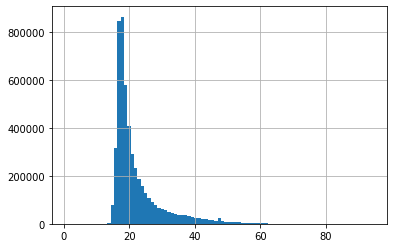

In [14]:
enem['NU_IDADE'].hist(bins=91)

In [15]:
enem['SG_UF_RESIDENCIA'].value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

In [16]:
dist_sexo = enem['TP_SEXO'].value_counts()
dist_sexo

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

In [17]:
# Calculo de percetual com List Compreention
percent_sexo = [100 * x / dist_sexo.sum() for x in dist_sexo]
print(f"{percent_sexo[0]}% para mulheres e {percent_sexo[1]}% para homens.")

59.50267601128105% para mulheres e 40.49732398871895% para homens.


In [18]:
colunas_sexo_redacao = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [19]:
# Filtrando DataFrame
enem_sexo_redacao = enem.filter(items=colunas_sexo_redacao)

In [20]:
enem_sexo_redacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
3,M,NaN
4,M,NaN


In [21]:
enem_sexo_redacao = enem_sexo_redacao.dropna()

In [22]:
enem_sexo_redacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
5,M,580.0
6,F,360.0


In [23]:
enem_sexo_redacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


In [24]:
enem_sexo_redacao.groupby("TP_SEXO").max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [25]:
enem_sexo_redacao.groupby("TP_SEXO").min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


In [26]:
enem_sexo_redacao[enem_sexo_redacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [27]:
enem_sexo_redacao[enem_sexo_redacao.NU_NOTA_REDACAO > 40].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,60.0
M,60.0


In [28]:
enem_sexo_redacao[enem_sexo_redacao.NU_NOTA_REDACAO > 60].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,80.0
M,80.0


In [29]:
enem_sexo_redacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,577.159368
M,562.396035


In [30]:
enem_sexo_redacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,580.0


In [31]:
enem_sexo_redacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

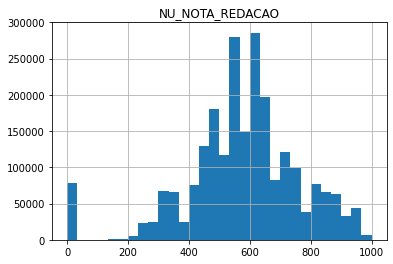

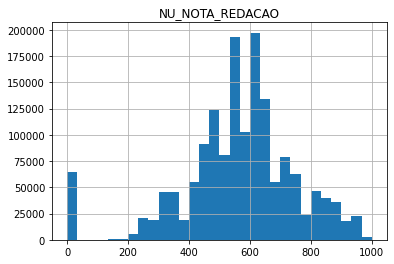

In [32]:
enem_sexo_redacao.groupby('TP_SEXO').hist(bins=30)

In [33]:
colunas_selecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [34]:
enem_nota_parentes = enem.filter(items=colunas_selecionadas)

In [35]:
enem_nota_parentes.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,780.0,D,E
1,190001004628,600.0,D,E
2,190001004629,640.0,H,E
3,190001004630,NaN,D,D
4,190001004631,NaN,B,C


In [36]:
enem_nota_parentes = enem_nota_parentes.dropna()

In [37]:
enem_nota_parentes.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,780.0,D,E
1,190001004628,600.0,D,E
2,190001004629,640.0,H,E
5,190001004632,580.0,C,C
6,190001004633,360.0,B,B


# Questionário dos indicadores socioeconômicos
+ Q001 - Até que série seu pai estudou?
+ Q002 - Até que série sua mãe estudou?

In [38]:
dicionario_q001_q002 = {'A':'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

## Criar novas colunas no DataFrame
+ Inserindo coluna NO_Q001

In [39]:
# contagem
enem_nota_parentes.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,200331
B,805643
C,548748
D,459610
E,1058282
F,320457
G,200793
H,329280


In [40]:
# Criar coluna NO_Q001
enem_nota_parentes['NO_Q001'] = [dicionario_q001_q002[resp] for resp in enem_nota_parentes.Q001]

In [41]:
# Criar coluna NO_Q002
enem_nota_parentes['NO_Q002'] = [dicionario_q001_q002[resp] for resp in enem_nota_parentes.Q002]

In [42]:
enem_nota_parentes.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
5,190001004632,580.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,360.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...


### Relacionando número de inscritos com escolaridade dos pais

In [43]:
# Pai
enem_nota_parentes.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by=('NU_INSCRICAO'))

,NU_INSCRICAO
NO_Q001,
Nunca estudou,200331
Completou a Pós-graduação,200793
"Completou a Faculdade, mas não completou a Pós-graduação",320457
Não sei,329280
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",459610
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",548748
Não completou a 4ª série/5º ano do Ensino Fundamental,805643
"Completou o Ensino Médio, mas não completou a Faculdade",1058282


In [44]:
# Mãe
enem_nota_parentes.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=True)

,NU_INSCRICAO
NO_Q002,
Não sei,105325
Nunca estudou,130880
Completou a Pós-graduação,345941
"Completou a Faculdade, mas não completou a Pós-graduação",433935
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",503999
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",507256
Não completou a 4ª série/5º ano do Ensino Fundamental,592468
"Completou o Ensino Médio, mas não completou a Faculdade",1303340


In [45]:
mae = enem_nota_parentes.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count()

<AxesSubplot:xlabel='NO_Q002'>

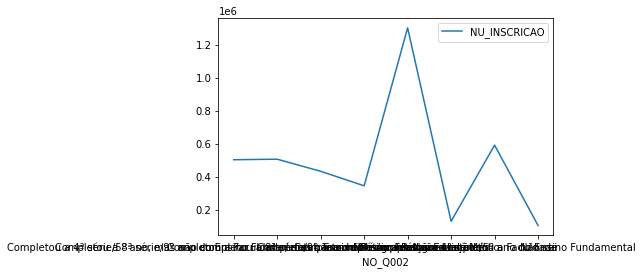

In [46]:
mae.plot()

### Englobando município e estado de residencia

In [48]:
colunas_selec = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [51]:
enem_uf = enem.filter(items=colunas_selec)

In [52]:
enem_uf.head(3)

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,Q001,Q002
0,190001004627,PA,780.0,D,E
1,190001004628,PA,600.0,D,E
2,190001004629,PA,640.0,H,E


In [56]:
enem_uf['NO_Q001'] = [dicionario_q001_q002[resp] for resp in enem_uf['Q001']]
enem_uf['NO_Q002'] = [dicionario_q001_q002[resp] for resp in enem_uf.Q002]

In [57]:
enem_uf.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,190001004627,PA,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,PA,600.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,PA,640.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
3,190001004630,PA,NaN,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
4,190001004631,PA,NaN,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."


In [58]:
enem_uf.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).where(enem_uf.SG_UF_RESIDENCIA == 'RN')\
                                                    .groupby('NO_Q001')\
                                                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,708.929293
"Completou a Faculdade, mas não completou a Pós-graduação",686.551446
"Completou o Ensino Médio, mas não completou a Faculdade",615.137559
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",580.160958
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",560.131365
Não sei,544.982436
Não completou a 4ª série/5º ano do Ensino Fundamental,539.763975
Nunca estudou,511.347137


In [59]:
enem_uf.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).where(enem_uf.SG_UF_RESIDENCIA == 'DF')\
                                                    .groupby('NO_Q001')\
                                                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,698.103030
"Completou a Faculdade, mas não completou a Pós-graduação",666.527051
"Completou o Ensino Médio, mas não completou a Faculdade",596.712390
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",563.397307
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549.519908
Não sei,539.558847
Não completou a 4ª série/5º ano do Ensino Fundamental,523.741892
Nunca estudou,471.136225


In [64]:
enem_uf.filter(items=['NU_NOTA_REDACAO', 'NO_Q001', 'SG_UF_RESIDENCIA']).groupby(['SG_UF_RESIDENCIA', 'NO_Q001']).mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q001                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       528.568720
                 Completou a 8ª série/9º ano do Ensino Fundament...       535.711631
                 Completou a Faculdade, mas não completou a Pós-...       610.580771
                 Completou a Pós-graduação                                637.857143
                 Completou o Ensino Médio, mas não completou a F...       559.518314
...                                                                              ...
TO               Completou a Pós-graduação                                675.814227
                 Completou o Ensino Médio, mas não completou a F...       573.981304
                 Nunca estudou                                            463.656109
                 Não completou a 4ª série/5º ano do Ensino Funda...       507.535642
                 Não sei                                                  517.603524

[216 rows x 1 columns]

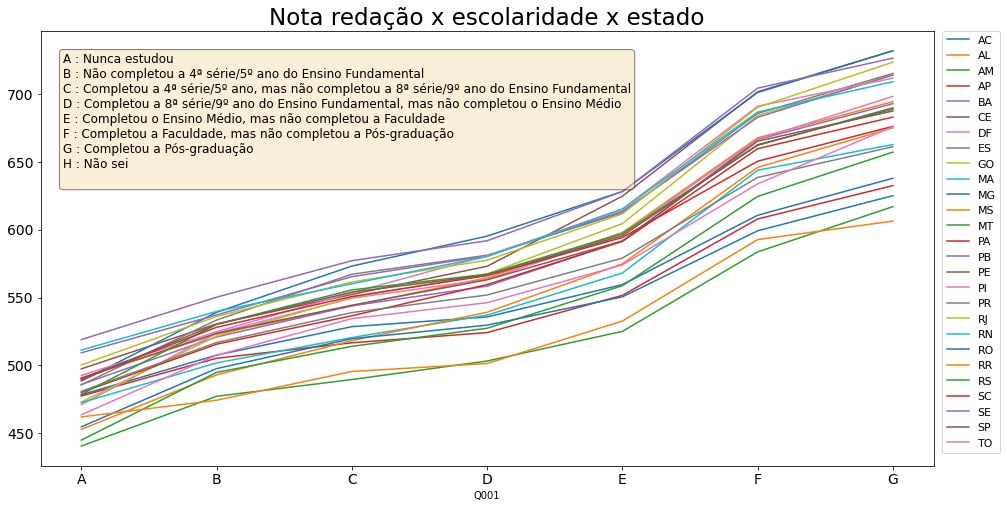

In [109]:
ax = enem_uf.filter(items=['SG_UF_RESIDENCIA','Q001','NU_NOTA_REDACAO' ])\
                                .where(enem_uf.Q001 != 'H')\
                                .groupby(['Q001','SG_UF_RESIDENCIA'])\
                                .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                .unstack().plot(figsize=(16, 8), fontsize=14, grid=False)
ax.set_title('Nota redação x escolaridade x estado', fontsize=23)

handles, labels = ax.get_legend_handles_labels()

edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=11)

textdictQ001 = ""
for key, value in dicionario_q001_q002.items():
    textdictQ001 = textdictQ001 + f"{key} : {value}\n"

ax.text(0.025,0.65, textdictQ001, transform=ax.transAxes, fontsize=12,
       bbox={'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5});

## Nota do Enem x IDHM

In [113]:
colunas_selec = ['CO_MUNICIPIO_RESIDENCIA',
                'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA','NU_NOTA_CN',
                'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [114]:
dd_enem_residencia = dd.read_csv('dados/MICRODADOS_ENEM_2019.csv', blocksize=100*1024*1024, usecols=colunas_selec,\
                              sep=';', encoding='ISO-8859-1')

enem_residencia = dd_enem_residencia.compute(num_workers=8)

In [115]:
enem_residencia.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1506807,Santarém,15,PA,472.9,466.0,497.3,369.1,780.0
1,1504059,Mãe do Rio,15,PA,358.9,495.4,482.3,416.5,600.0
2,1505502,Paragominas,15,PA,574.2,538.7,582.6,571.5,640.0
3,1507706,São Sebastião da Boa Vista,15,PA,NaN,NaN,NaN,NaN,NaN
4,1503903,Juruti,15,PA,NaN,NaN,NaN,NaN,NaN


In [118]:
media_enem_residencia = enem_residencia.groupby(['CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA'], as_index=False).mean()

In [119]:
media_enem_residencia

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222
...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655


In [127]:
media_enem_residencia.columns.values

array(['Unnamed: 0', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], dtype=object)

In [132]:
# Esportando como csv
media_enem_residencia.to_csv('dados/media_enem_residencia.csv', index=False,
                             columns=['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
                             'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH',
                             'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [133]:
dd_media_enem_residencia = dd.read_csv('dados/media_enem_residencia.csv', blocksize=100*1024*1024, 
                                       sep=',', encoding='UTF-8')

media_enem_residencia = dd_media_enem_residencia.compute(num_workers=8)

In [134]:
media_enem_residencia.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [155]:
idhm_municipios = pd.read_csv('dados/idhm_municipios_2010.csv', sep=',')

In [156]:
idhm_municipios.head()

,codMunicipio,Município,Estado,MUNICIPIO_ESTADO,IDHM,IDHM_R,IDHM_L,IDHM_E
0,5200050,Abadia de Goiás,GO,ABADIA DE GOIÁS-GO,"0,708","0,687","0,83","0,622"
1,3100104,Abadia dos Dourados,MG,ABADIA DOS DOURADOS-MG,"0,689","0,693","0,839","0,563"
2,5200100,Abadiânia,GO,ABADIÂNIA-GO,"0,689","0,671","0,841","0,579"
3,3100203,Abaeté,MG,ABAETÉ-MG,"0,698","0,72","0,848","0,556"
4,1500107,Abaetetuba,PA,ABAETETUBA-PA,"0,628","0,579","0,798","0,537"


In [157]:
# Agrupando dados de dois dataframes
enem_media_idhm = pd.merge(media_enem_residencia, idhm_municipios, how='left', left_on='CO_MUNICIPIO_RESIDENCIA', right_on=['codMunicipio'])

In [158]:
enem_media_idhm.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,Município,Estado,MUNICIPIO_ESTADO,IDHM,IDHM_R,IDHM_L,IDHM_E
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1100015,Alta Floresta D'Oeste,RO,ALTA FLORESTA D'OESTE-RO,"0,641","0,657","0,763","0,526"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1100023,Ariquemes,RO,ARIQUEMES-RO,"0,702","0,716","0,806","0,6"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,1100031,Cabixi,RO,CABIXI-RO,"0,65","0,65","0,757","0,559"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,1100049,Cacoal,RO,CACOAL-RO,"0,718","0,727","0,821","0,62"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,1100056,Cerejeiras,RO,CEREJEIRAS-RO,"0,692","0,688","0,799","0,602"


In [159]:
enem_media_idhm.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
MUNICIPIO_ESTADO            object
IDHM                        object
IDHM_R                      object
IDHM_L                      object
IDHM_E                      object
dtype: object

In [160]:
# corrigindo formatação de números
enem_media_idhm['IDHM'] = enem_media_idhm['IDHM'].apply(lambda x: float(str(x).replace(",",".")))
enem_media_idhm['IDHM_E'] = enem_media_idhm['IDHM_E'].apply(lambda x: float(str(x).replace(",",".")))
enem_media_idhm['IDHM_R'] = enem_media_idhm['IDHM_R'].apply(lambda x: float(str(x).replace(",",".")))
enem_media_idhm['IDHM_L'] = enem_media_idhm['IDHM_L'].apply(lambda x: float(str(x).replace(",",".")))

ValueError: could not convert string to float: '0.550td>'

In [161]:
enem_media_idhm['IDHM_R'] = enem_media_idhm['IDHM_R'].apply(lambda x: str(x).replace("td>",""))
enem_media_idhm['IDHM_L'] = enem_media_idhm['IDHM_L'].apply(lambda x: str(x).replace("td>",""))

In [162]:
enem_media_idhm['IDHM_R'] = enem_media_idhm['IDHM_R'].apply(lambda x: float(str(x).replace(",",".")))
enem_media_idhm['IDHM_L'] = enem_media_idhm['IDHM_L'].apply(lambda x: float(str(x).replace(",",".")))

In [163]:
enem_media_idhm.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
MUNICIPIO_ESTADO            object
IDHM                       float64
IDHM_R                     float64
IDHM_L                     float64
IDHM_E                     float64
dtype: object

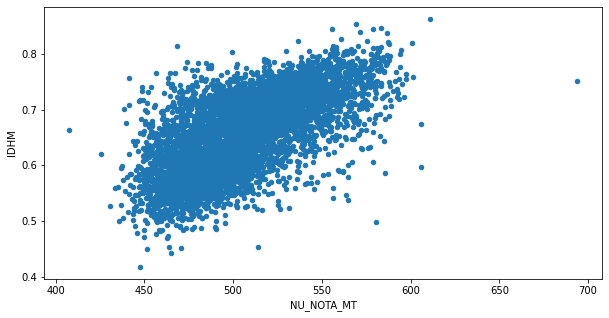

In [169]:
enem_media_idhm.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(10, 5));

In [171]:
with open('dados/municipios.csv') as f:
    print(f)

<_io.TextIOWrapper name='dados/municipios.csv' mode='r' encoding='UTF-8'>


In [174]:
# Importando dados dos municipios
municipios = pd.read_csv('dados/municipios.csv', encoding='UTF-8')
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [175]:
enem_idhm_municipios = pd.merge(enem_media_idhm, municipios, how='left',
                                left_on=['CO_MUNICIPIO_RESIDENCIA'],
                               right_on=['codigo_ibge'])

In [176]:
enem_idhm_municipios.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,...,IDHM,IDHM_R,IDHM_L,IDHM_E,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1100015,...,0.641,0.657,0.763,0.526,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1100023,...,0.702,0.716,0.806,0.600,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,1100031,...,0.650,0.650,0.757,0.559,1100031,Cabixi,-13.49450,-60.5520,0,11
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,1100049,...,0.718,0.727,0.821,0.620,1100049,Cacoal,-11.43430,-61.4562,0,11
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,1100056,...,0.692,0.688,0.799,0.602,1100056,Cerejeiras,-13.18700,-60.8168,0,11


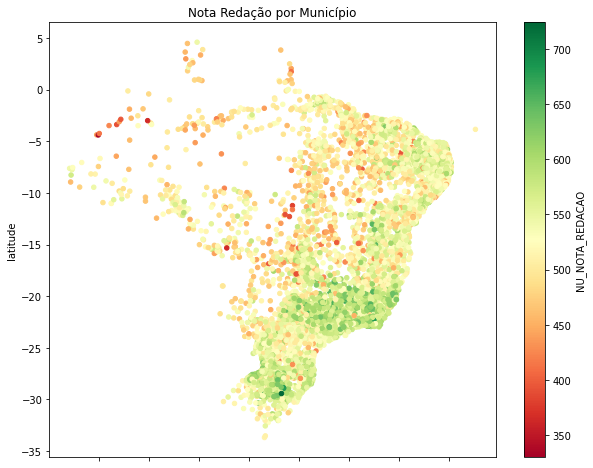

In [189]:
# (c) é o parâmetro pra cor do ponto do gráfico
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c='NU_NOTA_REDACAO', 
                                  colormap='RdYlGn', figsize=(10,8), title='Nota Redação por Município');